SVM Test Results:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18117
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21891
   macro avg       0.93      0.76      0.83     21891
weighted avg       0.97      0.97      0.97     21891

Matthews Correlation Coefficient: 0.8912758917268929
Confusion Matrix:
[[18085    10    17     1     4]
 [  237   314     5     0     0]
 [  170     2  1249    25     2]
 [   71     0    13    78     0]
 [  135     0     8     0  1465]]
Normalized Confusion Matrix:
[[9.98233703e-01 5.51967765e-04 9.38345201e-04 5.51967765e-05
  2.20787106e-04]
 [4.26258993e-01 5.64748201e-01 8.99280576e-03 0.00000000e+00
  0.00000000e+00]
 [1.17403315e-01 1.38121547e-03 8.62569061e-01 1.72651934e-02
  1.3

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

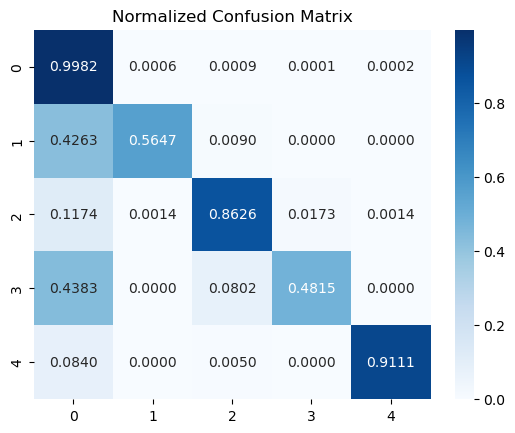

In [1]:
#default
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np

# Load the train and test datasets using Pandas
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

# Split the train and test datasets into X and y
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Train the SVM model with default hyperparameters
svm_cl = SVC()
svm_cl.fit(X_train, y_train)

# Evaluate the model on the test dataset
y_test_pred = svm_cl.predict(X_test)
print('SVM Test Results:')
print(classification_report(y_test, y_test_pred))
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Map labels to their corresponding values
label_map = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
label_names = [label_map[i] for i in range(len(label_map))]

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print('Normalized Confusion Matrix:')
print(normalized_cm)

sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.4f')
plt.title('Normalized Confusion Matrix')
colorbar = plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(len(label_names)) + 0.5, label_names)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names)
plt.show()


SVM Test Results:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18117
         1.0       0.91      0.46      0.61       556
         2.0       0.82      0.28      0.42      1448
         3.0       0.65      0.34      0.45       162
         4.0       0.99      0.87      0.92      1608

    accuracy                           0.92     21891
   macro avg       0.86      0.59      0.67     21891
weighted avg       0.92      0.92      0.91     21891

Matthews Correlation Coefficient: 0.7118860170309477
Confusion Matrix:
[[18035    23    51     0     8]
 [  282   257    17     0     0]
 [ 1003     0   404    30    11]
 [  102     0     5    55     0]
 [  196     1    13     0  1398]]
Normalized Confusion Matrix:
[[9.95473864e-01 1.26952586e-03 2.81503560e-03 0.00000000e+00
  4.41574212e-04]
 [5.07194245e-01 4.62230216e-01 3.05755396e-02 0.00000000e+00
  0.00000000e+00]
 [6.92679558e-01 0.00000000e+00 2.79005525e-01 2.07182320e-02
  7.5

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

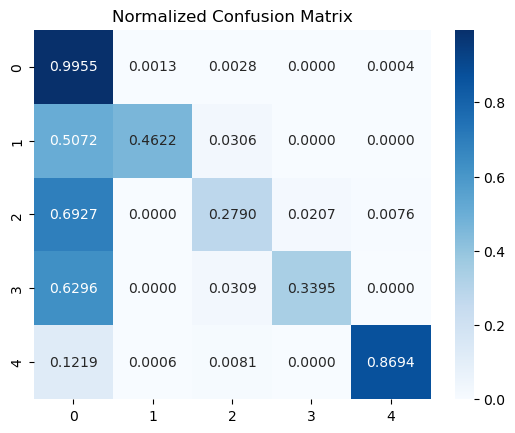

In [2]:
#Kich ban 1: Fine-tuned hyperparameter
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np

# Load the train and test datasets using Pandas
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

# Split the train and test datasets into X and y
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Train the SVM model with specific hyperparameters
svm_cl = SVC(kernel='linear', C=1.0)
svm_cl.fit(X_train, y_train)

# Evaluate the model on the test dataset
y_test_pred = svm_cl.predict(X_test)
print('SVM Test Results:')
print(classification_report(y_test, y_test_pred))
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Map labels to their corresponding values
label_map = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
label_names = [label_map[i] for i in range(len(label_map))]

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print('Normalized Confusion Matrix:')
print(normalized_cm)

sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.4f')
plt.title('Normalized Confusion Matrix')
colorbar = plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(len(label_names)) + 0.5, label_names)
plt.yticks(np.arange(len(label_names)) + 0.5, label_names)
plt.show()
